In [1]:
import numpy as np
import pandas as pd
import random
import math
from random import choices

from arms.bernoulli import BernoulliArm
%matplotlib inline

In [2]:
class EXP3():
    
    def __init__(self, gamma, weights):
        self.gamma = gamma
        self.weights = weights
  
    def initialize(self, n_arms):
        self.weights = [1.0 for i in range(n_arms)]
    
    def select_arm(self):
        n_arms = len(self.weights)
        total_weight = sum(self.weights)
        probs = [0.0 for i in range(n_arms)]
        for arm in range(n_arms):
            probs[arm] = (1 - self.gamma) * (self.weights[arm] / total_weight)
            probs[arm] = probs[arm] + (self.gamma) * (1.0 / float(n_arms))
        return choices(range(len(self.weights)),probs)[0]
  
    def update(self, chosen_arm, reward):
        n_arms = len(self.weights)
        total_weight = sum(self.weights)
        probs = [0.0 for i in range(n_arms)]
        for arm in range(n_arms):
            probs[arm] = (1 - self.gamma) * (self.weights[arm] / total_weight)
            probs[arm] = probs[arm] + (self.gamma) * (1.0 / float(n_arms))

        x = reward / probs[chosen_arm]

        growth_factor = math.exp((self.gamma / n_arms) * x)
        self.weights[chosen_arm] = self.weights[chosen_arm] * growth_factor

#### Random Simulation

In [3]:
random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm = np.argmax(means)
print("Best arm is " + str(best_arm))

Best arm is 2


In [4]:
from testing_framework.tests import *

dfs = []
for gamma in [0.1, 0.2, 0.3, 0.4, 0.5]:
    algo = EXP3(gamma, [])
    algo.initialize(n_arms)
    results = test_algorithm(algo, arms, 5000, 250)
    df = pd.DataFrame(np.array(results).T)
    df['Gamma'] = gamma
    dfs.append(df)
    
dataframe = pd.concat(dfs,ignore_index=True)
dataframe.columns = ["Sim", "T", "ChosenArm", "Reward", "CumulativeReward", "Gamma"]

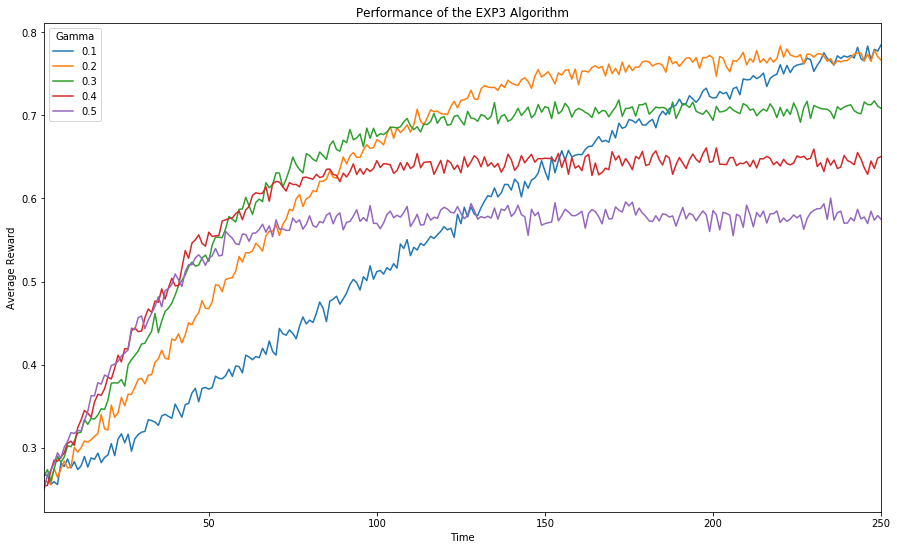

In [5]:
ax = dataframe.groupby(["T","Gamma"]).mean().reset_index().pivot('T','Gamma','Reward').plot(figsize=(15,9))
ax.set_title("Performance of the EXP3 Algorithm")
ax.set_ylabel('Average Reward');
ax.set_xlabel('Time');

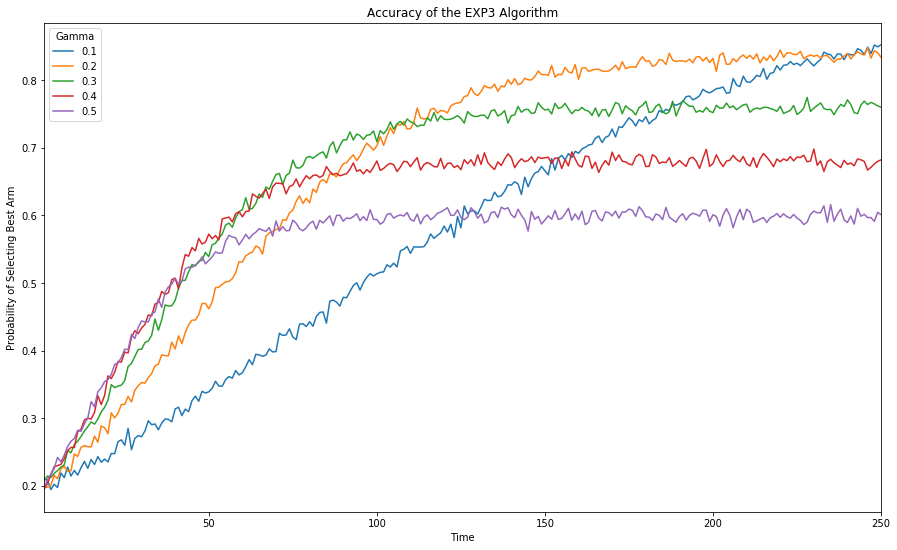

In [6]:
df_grouped = dataframe.groupby(["T","Gamma","ChosenArm"]).count()/dataframe.Sim.max()
df_grouped  = df_grouped .reset_index()
ax = df_grouped[df_grouped['ChosenArm'] == float(best_arm)].pivot('T','Gamma','Reward').plot(figsize=(15,9))
ax.set_title("Accuracy of the EXP3 Algorithm")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

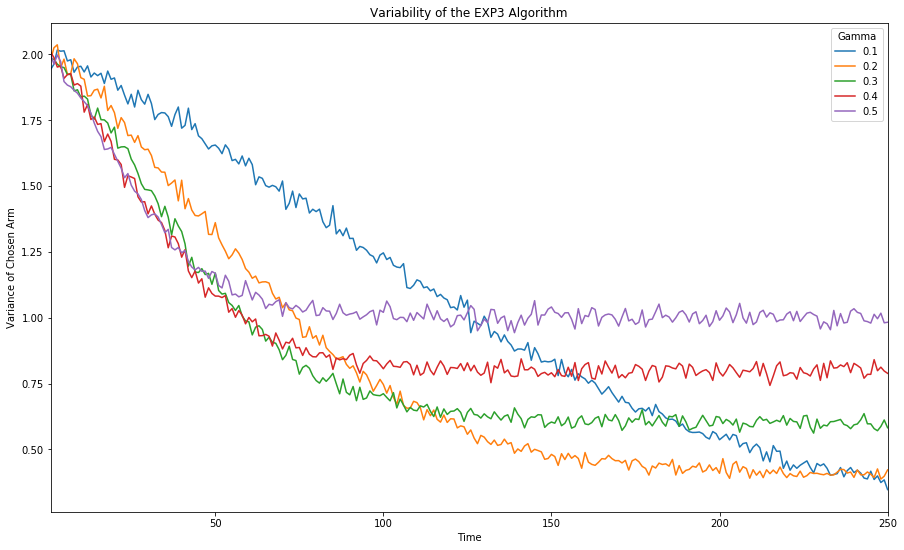

In [7]:
ax = dataframe.groupby(["T","Gamma"]).var().reset_index().pivot('T','Gamma','ChosenArm').plot(figsize=(15,9))
ax.set_title("Variability of the EXP3 Algorithm")
ax.set_ylabel('Variance of Chosen Arm');
ax.set_xlabel('Time');

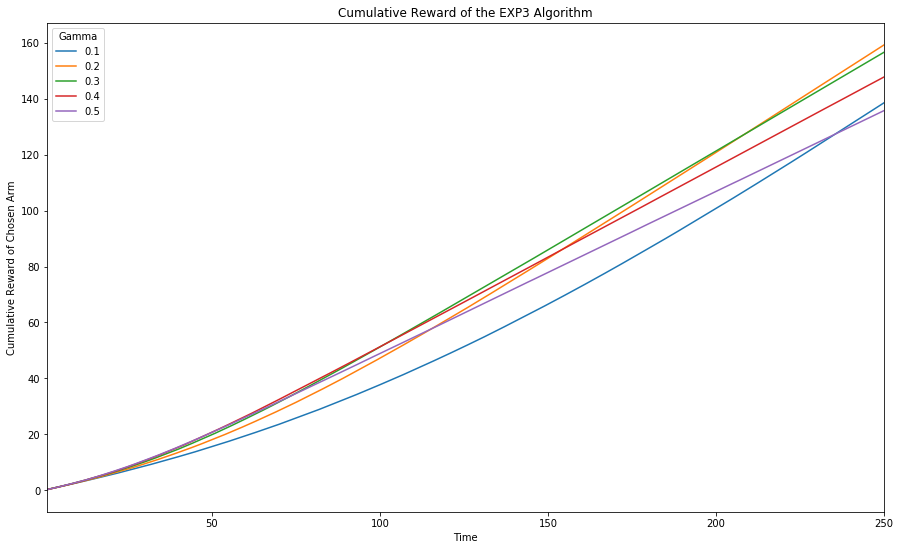

In [8]:
ax = dataframe.groupby(["T","Gamma"]).mean().reset_index().pivot('T','Gamma','CumulativeReward').plot(figsize=(15,9))
ax.set_title("Cumulative Reward of the EXP3 Algorithm")
ax.set_ylabel('Cumulative Reward of Chosen Arm');
ax.set_xlabel('Time');

In [9]:
dataframe.to_csv("EXP3_results.csv",index=None)

#### Adversarial Simulation with two arms

In [10]:
from arms.adversarial import AdversarialArm

arms = [AdversarialArm(True), AdversarialArm(False)]
n_arms = len(arms)

In [12]:
dfs = []
for exp3_gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
    algo = EXP3(exp3_gamma, [])
    algo.initialize(n_arms)
    results = test_algorithm_adversarial_2arms(algo, arms, 5000, 500,125)
    df = pd.DataFrame(np.array(results).T)
    df['Gamma'] = exp3_gamma
    dfs.append(df)
    
dataframe = pd.concat(dfs,ignore_index=True)
dataframe.columns = ["Sim", "T", "ChosenArm", "Reward", "CumulativeReward", "Gamma"]

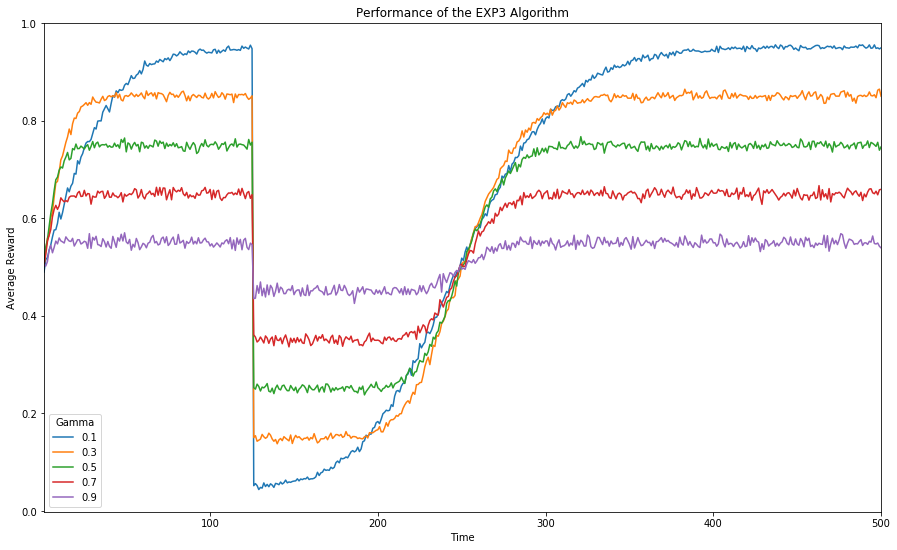

In [13]:
ax = dataframe.groupby(["T","Gamma"]).mean().reset_index().pivot('T','Gamma','Reward').plot(figsize=(15,9))
ax.set_title("Performance of the EXP3 Algorithm")
ax.set_ylabel('Average Reward');
ax.set_xlabel('Time');

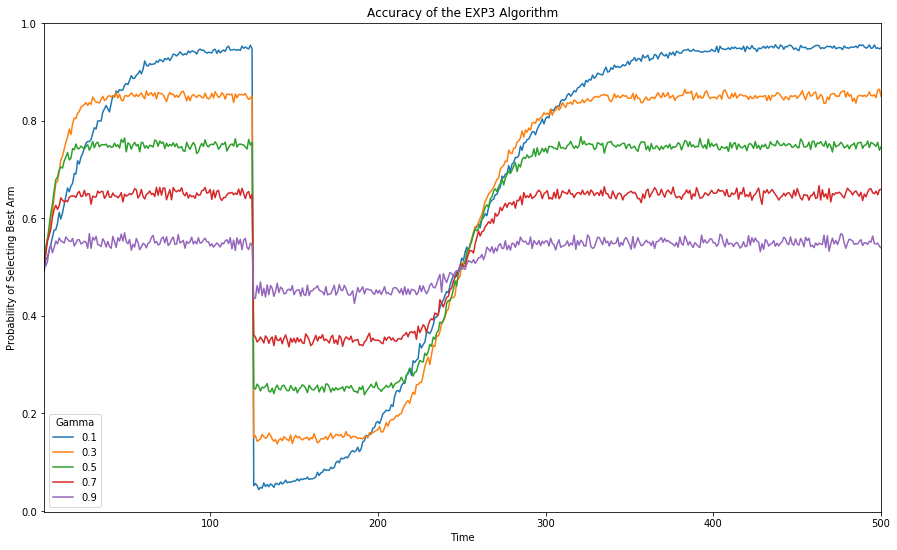

In [14]:
df_grouped = dataframe.groupby(["T","Gamma","ChosenArm"]).count()/dataframe.Sim.max()
df_grouped  = df_grouped .reset_index()
df_grouped.loc[df_grouped['T'] <= 125,'BestArm'] = 0
df_grouped.loc[df_grouped['T'] > 125,'BestArm'] = 1
ax = df_grouped[df_grouped['ChosenArm'] == df_grouped['BestArm']].pivot('T','Gamma','Reward').plot(figsize=(15,9))
ax.set_title("Accuracy of the EXP3 Algorithm")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

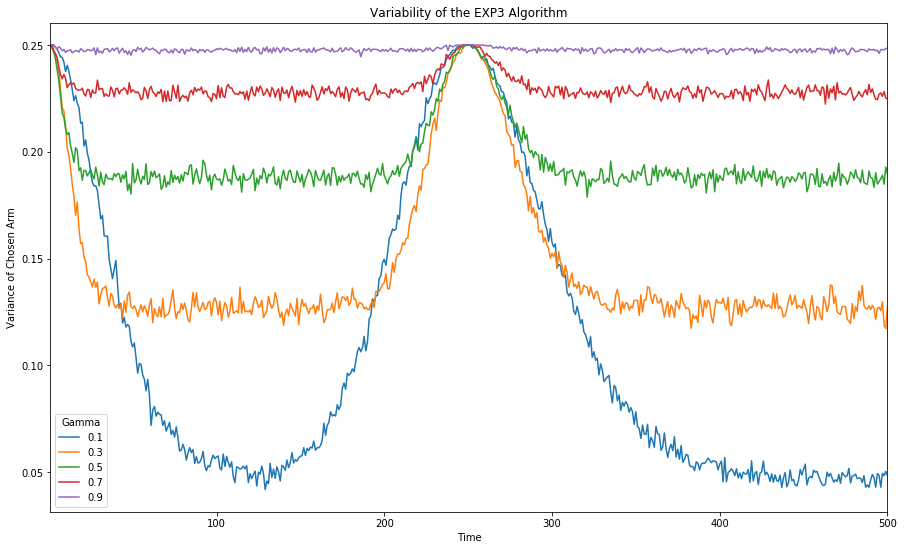

In [15]:
ax = dataframe.groupby(["T","Gamma"]).var().reset_index().pivot('T','Gamma','ChosenArm').plot(figsize=(15,9))
ax.set_title("Variability of the EXP3 Algorithm")
ax.set_ylabel('Variance of Chosen Arm');
ax.set_xlabel('Time');

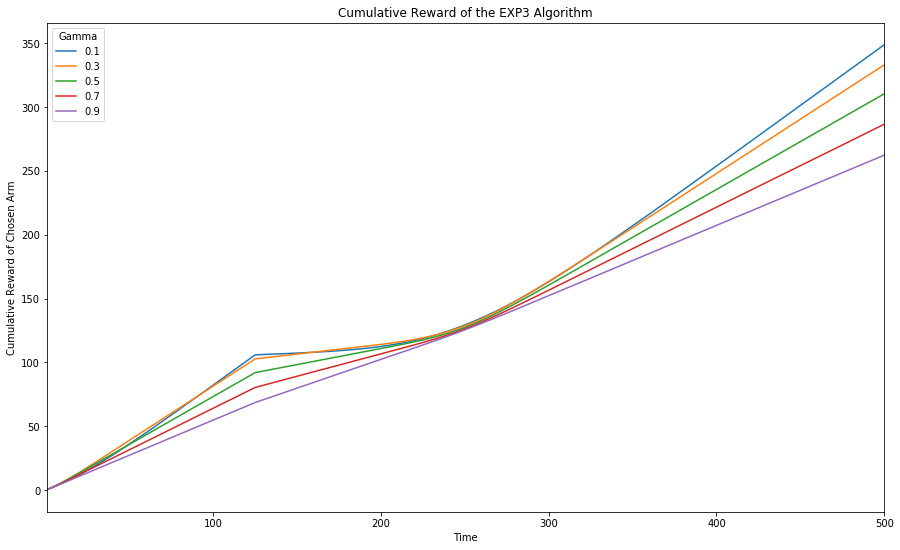

In [16]:
ax = dataframe.groupby(["T","Gamma"]).mean().reset_index().pivot('T','Gamma','CumulativeReward').plot(figsize=(15,9))
ax.set_title("Cumulative Reward of the EXP3 Algorithm")
ax.set_ylabel('Cumulative Reward of Chosen Arm');
ax.set_xlabel('Time');